In [ ]:
# @ElsaTH

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import requests
import json

In [2]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40532,NaN,NaN,International,2020-08-26,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40533,NaN,NaN,International,2020-08-27,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40534,NaN,NaN,International,2020-08-28,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40535,NaN,NaN,International,2020-08-29,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data2 = data.loc[:,["location","date","new_cases"]]
data2

,location,date,new_cases
0,Afghanistan,2019-12-31,0.0
1,Afghanistan,2020-01-01,0.0
2,Afghanistan,2020-01-02,0.0
3,Afghanistan,2020-01-03,0.0
4,Afghanistan,2020-01-04,0.0
...,...,...,...
40532,International,2020-08-26,NaN
40533,International,2020-08-27,NaN
40534,International,2020-08-28,NaN
40535,International,2020-08-29,NaN


In [4]:
data2.set_index(["location"],inplace=True)

In [5]:
data2 = data2.loc[["Argentina"],:].dropna()
data2

,date,new_cases
location,,
Argentina,2020-03-04,1.0
Argentina,2020-03-06,1.0
Argentina,2020-03-07,6.0
Argentina,2020-03-08,1.0
Argentina,2020-03-09,3.0
...,...,...
Argentina,2020-08-12,7369.0
Argentina,2020-08-13,7043.0
Argentina,2020-08-14,7663.0


In [5]:
data2.reset_index(inplace=True)
data2

,location,date,new_cases
0,Afghanistan,2019-12-31,0.0
1,Afghanistan,2020-01-01,0.0
2,Afghanistan,2020-01-02,0.0
3,Afghanistan,2020-01-03,0.0
4,Afghanistan,2020-01-04,0.0
...,...,...,...
40532,International,2020-08-26,NaN
40533,International,2020-08-27,NaN
40534,International,2020-08-28,NaN
40535,International,2020-08-29,NaN


In [6]:
data2.set_index("date", inplace=True)
data2

,location,new_cases
date,,
2019-12-31,Afghanistan,0.0
2020-01-01,Afghanistan,0.0
2020-01-02,Afghanistan,0.0
2020-01-03,Afghanistan,0.0
2020-01-04,Afghanistan,0.0
...,...,...
2020-08-26,International,NaN
2020-08-27,International,NaN
2020-08-28,International,NaN


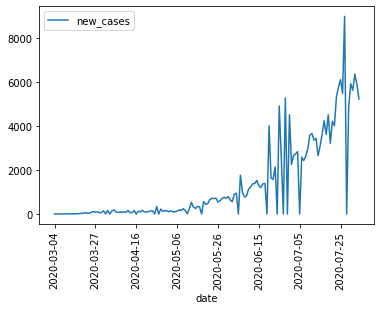

In [8]:
data2.plot(rot=90)

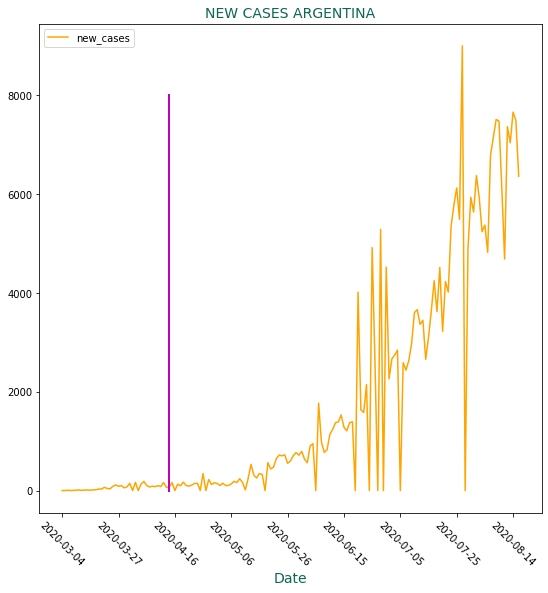

In [13]:
data2.plot(figsize=(9,9), rot=-45, color="orange")
plt.xlabel("Date", size=14, color="#0E6655")
plt.plot([38,38],[0,8000],'k-', lw=2, color="m")
plt.title("NEW CASES ARGENTINA", size=14, color="#0E6655")
plt.savefig('new_cases_argentina.png')


Observación de outliers

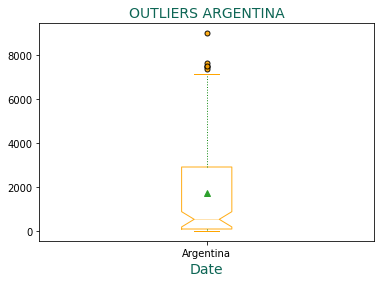

In [14]:
plt.boxplot(data2.new_cases,
            notch=True, patch_artist=None,
            capprops=dict(color="orange",markerfacecolor='g'),
            medianprops=dict(color="orange", alpha=0.3),
            whiskerprops=dict(color="green",alpha=0.9, markersize=17,linestyle = 'dotted'),
            flierprops=dict(color="green",alpha=0.9, markersize=5,markerfacecolor="orange", marker='o'),
            boxprops=dict(color="orange",alpha=0.9, markersize=5),
            showmeans=dict(color="green",alpha=0.9, markersize=5),
            showfliers=dict(color="green",alpha=0.9, markersize=5),
            showbox=dict(color="green",alpha=0.9, markersize=5),
            showcaps=dict(color="green",alpha=0.9, markersize=5)
          )

            
plt.title("OUTLIERS ARGENTINA",size=14, color="#0E6655")
plt.xticks([1], ['Argentina'])
plt.xlabel("Date", size=14, color="#0E6655")
plt.savefig('outliers_argentina.png')
plt.show()

In [ ]:
Se observa que existen outliers de días que se han registrado más datos de lo normal, pero no hay datos que no puedan corresponder a la realidad de la situación debido a incremento en los nuevos casos.